# PREDICTIVE MODELINGS FOR MEMBERSHIP RETETNTION

In this file, you will see two models, one for lifetime conversion and another for churn analysis. Both models are built on the same data.

Our model is built on those people who are annual member last year, and predict their membership status next year, whether they will upgrade to lifetime or leave.

And this modeling scripts are built by CAL Team (Patrick Seng, Sam Musch, Pardha, Sameeksha and Shaco) collective efforts. For any issues and doubts, feel free to message them. 

## Preparation

The below chunks are used for importing built-in packages for modeling training. You don't need to change the content. Just run it. These packages are like stored procedures in SQL, written functions.

In [2]:
%matplotlib inline
# import necessary libraries and specify that graphs should be plotted inline. 
# from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score, train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report,auc, accuracy_score, confusion_matrix, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction import DictVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pydotplus
import seaborn as sns
from sklearn.tree import export_graphviz
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

The below chunk is used for importing the dataset for training.

We basically need to files for model training:
* Behavior related data, contains their engagement scores, past memberships, click through rate etc
* Demographic related data, contains their demographic features including household income, age etc.


In the future, when you need to read data from other files, you just need to change work directory. 
For example, instead of doing `pd.read_csv('Data_new_member_training_final.csv')`, 
you can do 
* `pd.read_csv('..\5 Predictive Scriptis\Data_new_member_training_final.csv')`

Add the relative path in front of the file name.
`..\filename` leads you to the parent directory.

In [3]:
# set work directory
path = ''
# load the data
past_five = pd.read_csv(path + 'Data_member_retention_training_final.csv')
# demographic features
individual = pd.read_csv(path + 'individual_info_cleaned.csv')

C:\Python\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The below chunk helps you to know the records in the data.
You just need to have `filename.head(N)` to print the most top records in your data.

If you want to see 10 records, just change the `number_of_records_to_print` accordingly.

In [389]:
number_of_records_to_print = 5
past_five.head(number_of_records_to_print)

,ID_DEMO,UMN_event,UMN_member,UMN_donor,UMN_volun,UMN_inform,UMN_loyalty,UMN_avg_Annual_score_5_years,annual_years,life_years,...,Social_emails,Sports_emails,general_ctr,Learning_events,Legislature_events,Networking_events,Other_events,Social_events,Sports_events,all_events
0,0000D38BF766D4EF9DBFB0446AE2F32E,0.0,0.0,0.00,0.0,3.50,0.0,3.50,1,0,...,0.452381,0.187500,0.016129,0,0,0,0,0,0,0
1,0000E4ABEC24DAB6D48282F478ECB142,0.0,0.0,0.00,0.0,3.75,0.0,3.75,1,0,...,0.666667,0.580645,0.065217,0,0,0,0,1,0,1
2,0003162CCA58ACE2A48C489C0B3E4902,0.0,0.0,0.00,0.0,1.00,0.0,1.00,1,0,...,0.066667,0.000000,0.000000,0,0,0,0,1,0,1
3,000324BAB36E3C8392715FE8B7761251,4.0,4.0,1.75,4.0,4.50,0.0,18.25,4,0,...,0.568966,0.636364,0.071429,4,0,0,0,2,0,6
4,00033D516A88B736A9E09B714E64230E,0.0,4.0,4.00,0.0,2.50,0.0,10.50,4,0,...,0.057143,0.153846,0.011111,0,0,0,0,0,0,0


In [390]:
individual.head(number_of_records_to_print)

,ID_DEMO,ID_SPOUSE,MARITAL_STATUS,GENDER,BIRTH_YEAR,AGE,ZIP_CODE,IN_TC_METRO_AREA,HOUSEHOLD_INCOME,MOST_RECENT_COLLEGE,MOST_RECENT_GRAD_YEAR,ATHLETIC_INTEREST,TRAVEL_INTEREST,MEMBERSHIP_TYPE_CODE,MEMBERSHIP_STATUS_CODE,FIRST_EVER_START_DATE,EXP_DATE_LAST_MEMBERSHIP
0,B82D254BFDBF620BD2E89B72A2D2C565,90337293E70D0155616BFFC0051EC77F,M,F,1955.0,65.0,94928,N,28000.000000,CSE,1995,N,N,L,C,1995-08-03,NaN
1,A2DC665A7CD4700DEA904961C7FAAA2F,NaN,D,M,1957.0,63.0,94941,N,121000.000000,CSE,1980,N,N,NaN,NaN,NaN,NaN
2,D48EA2FB011B88710AEB5BF41153E768,7DDBAABCB10975D6A5D3B3A8BE67388F,M,F,1955.0,65.0,55124,Y,101000.000000,CLA,1982,N,N,NaN,NaN,NaN,NaN
3,AB631288885A1848A60048B519B42EC9,NaN,M,F,1951.0,69.0,80437,N,88000.000000,CVM,1981,N,N,NaN,NaN,NaN,NaN
4,4388B261FAF06C3B333778F83F91F330,NaN,D,M,1957.0,63.0,34953,N,134952.714267,CCE,1980,N,N,NaN,NaN,NaN,NaN


This chunk below gives you what columns are included in your data file.

Every time you want to see it, just do `file_name.columns`

In [391]:
past_five.columns

Index(['ID_DEMO', 'UMN_event', 'UMN_member', 'UMN_donor', 'UMN_volun',
       'UMN_inform', 'UMN_loyalty', 'UMN_avg_Annual_score_5_years',
       'annual_years', 'life_years', 'nonmem_years', 'membership_LastYear',
       'membership_TwoYearsAgo', 'Learning_emails', 'Legislature_emails',
       'Social_emails', 'Sports_emails', 'general_ctr', 'Learning_events',
       'Legislature_events', 'Networking_events', 'Other_events',
       'Social_events', 'Sports_events', 'all_events'],
      dtype='object')

In [392]:
individual.columns

Index(['ID_DEMO', 'ID_SPOUSE', 'MARITAL_STATUS', 'GENDER', 'BIRTH_YEAR', 'AGE',
       'ZIP_CODE', 'IN_TC_METRO_AREA', 'HOUSEHOLD_INCOME',
       'MOST_RECENT_COLLEGE', 'MOST_RECENT_GRAD_YEAR', 'ATHLETIC_INTEREST',
       'TRAVEL_INTEREST', 'MEMBERSHIP_TYPE_CODE', 'MEMBERSHIP_STATUS_CODE',
       'FIRST_EVER_START_DATE', 'EXP_DATE_LAST_MEMBERSHIP'],
      dtype='object')

# Data Prepration

This chunk helps you select needed columns for training.
You can put/select columns that existed in the data by printing their columns like we did above, and then put those names in the brackets

In [393]:
# decide to keep which columns
# Pay attention, there are two brackets [[]] inside, don't delete them. These are Python coding rules.
# Feel free to add any columns you care about and you want to see.
individual_new = individual[['ID_DEMO','GENDER','AGE','HOUSEHOLD_INCOME','IN_TC_METRO_AREA']]

For those people who are annual member in 2018, we are predict their membership status in 2019. 

Once we have the model, train the model well, we will use it to predict the membership status for 2020

In [394]:
# This chunk helps us select people who are annual member last year.
# No need to change the this chunk in the future, just run it.
past_five = past_five[past_five.membership_TwoYearsAgo == 'annual-member']

This chunk is similar to the `Join` function in SQL, we join two tables together to store information in only one table.

**Parameters**
* New table name is "data", `how = 'xxx'`, can be inner, left or right. 
* `on = 'column name'`,  the column you define as key
* if you have multiple columns, you can do `=left_on = ['column1',column2]`,`right_on = ['column1','column2']`

For now, just run it, and no need to change

In [395]:
data = pd.merge(past_five, individual_new, how = 'inner', on = 'ID_DEMO')

The chunk below helps you know how many unique members in our data, since one ID_DEMO equals one member, so we just need to count the number of IDs in the table. This command is similar to `COUNT(DISTINCT ID_DEMO)` in SQL.

In [396]:
# There are unique 10222 annual members in 2018
data.ID_DEMO.nunique()

10222

In [397]:
# print top records
data.head(5)

,ID_DEMO,UMN_event,UMN_member,UMN_donor,UMN_volun,UMN_inform,UMN_loyalty,UMN_avg_Annual_score_5_years,annual_years,life_years,...,Legislature_events,Networking_events,Other_events,Social_events,Sports_events,all_events,GENDER,AGE,HOUSEHOLD_INCOME,IN_TC_METRO_AREA
0,000324BAB36E3C8392715FE8B7761251,4.0,4.0,1.75,4.00,4.5,0.0,18.25,4,0,...,0,0,0,2,0,6,F,81.0,89000.0,N
1,00033D516A88B736A9E09B714E64230E,0.0,4.0,4.00,0.00,2.5,0.0,10.50,4,0,...,0,0,0,0,0,0,M,87.0,245000.0,N
2,0009ACBC3A10AADFABBD0EB793512EEF,1.0,4.5,3.25,0.75,5.0,0.0,14.50,3,0,...,0,0,0,0,0,4,F,66.0,146000.0,Y
3,000C1F987EE884E7B211BB73277629C0,0.0,3.5,1.00,0.00,4.0,0.0,8.50,3,0,...,0,0,0,0,0,0,F,28.0,164000.0,N
4,000E3CA77FA96024A62F117C8CB0574F,0.0,0.0,0.00,0.00,3.0,0.0,3.00,1,0,...,0,0,0,0,0,0,F,29.0,13000.0,Y


The below chunk shows the missingness for each column. We want there is no missing values in our data. 

There is no missing values. The data is complete.

In [398]:
1 - data.count() / len(data.index)

# keep only non missing data
# data_nomissing = data.loc[(data.HOUSEHOLD_INCOME.notnull()),:]

ID_DEMO                         0.0
UMN_event                       0.0
UMN_member                      0.0
UMN_donor                       0.0
UMN_volun                       0.0
UMN_inform                      0.0
UMN_loyalty                     0.0
UMN_avg_Annual_score_5_years    0.0
annual_years                    0.0
life_years                      0.0
nonmem_years                    0.0
membership_LastYear             0.0
membership_TwoYearsAgo          0.0
Learning_emails                 0.0
Legislature_emails              0.0
Social_emails                   0.0
Sports_emails                   0.0
general_ctr                     0.0
Learning_events                 0.0
Legislature_events              0.0
Networking_events               0.0
Other_events                    0.0
Social_events                   0.0
Sports_events                   0.0
all_events                      0.0
GENDER                          0.0
AGE                             0.0
HOUSEHOLD_INCOME            

# Feature Engineer

In [399]:
data.head()

,ID_DEMO,UMN_event,UMN_member,UMN_donor,UMN_volun,UMN_inform,UMN_loyalty,UMN_avg_Annual_score_5_years,annual_years,life_years,...,Legislature_events,Networking_events,Other_events,Social_events,Sports_events,all_events,GENDER,AGE,HOUSEHOLD_INCOME,IN_TC_METRO_AREA
0,000324BAB36E3C8392715FE8B7761251,4.0,4.0,1.75,4.00,4.5,0.0,18.25,4,0,...,0,0,0,2,0,6,F,81.0,89000.0,N
1,00033D516A88B736A9E09B714E64230E,0.0,4.0,4.00,0.00,2.5,0.0,10.50,4,0,...,0,0,0,0,0,0,M,87.0,245000.0,N
2,0009ACBC3A10AADFABBD0EB793512EEF,1.0,4.5,3.25,0.75,5.0,0.0,14.50,3,0,...,0,0,0,0,0,4,F,66.0,146000.0,Y
3,000C1F987EE884E7B211BB73277629C0,0.0,3.5,1.00,0.00,4.0,0.0,8.50,3,0,...,0,0,0,0,0,0,F,28.0,164000.0,N
4,000E3CA77FA96024A62F117C8CB0574F,0.0,0.0,0.00,0.00,3.0,0.0,3.00,1,0,...,0,0,0,0,0,0,F,29.0,13000.0,Y


Our model isn't as smart as human. So sometime the model cannot understand all values.

In this table, we need to do several things:
* convert gender information from letters (M,F) to numbers (1,0)
* convert IN_TC_METRO_AREA information from letters (Y,N) to numbers (1,0)

In [400]:
data.GENDER = np.where(data.GENDER == 'M',1,0)
data.IN_TC_METRO_AREA = np.where(data.IN_TC_METRO_AREA == 'Y',1,0)

In [401]:
# rename the column names
# just want to keep them as UPPER case
data.rename({'UMN_event':'UMN EVENT', "UMN_member":"UMN MEMBER","UMN_donor":"UMN DONOR","UMN_volun":"UMN VOLUN","UMN_inform":"UMN INFORM",\
                   "UMN_loyalty":"UMN LOYALTY",'annual_years':'ANNUAL YEARS', 'life_years':"LIFE YEARS",\
       'nonmem_years':"NOT MEMBER YEARS", 'life_before_15_flag':"IF LIFE MEMBER BEFORE 2015", 'ctr':"CLICK THROUGH RATE",\
       'events_total':'EVENTS ATTENDED IN TOTAL','general_ctr':"CLICK THROUGH RATE"}, inplace = True, axis =1)

In [402]:
data.head()

,ID_DEMO,UMN EVENT,UMN MEMBER,UMN DONOR,UMN VOLUN,UMN INFORM,UMN LOYALTY,UMN_avg_Annual_score_5_years,ANNUAL YEARS,LIFE YEARS,...,Legislature_events,Networking_events,Other_events,Social_events,Sports_events,all_events,GENDER,AGE,HOUSEHOLD_INCOME,IN_TC_METRO_AREA
0,000324BAB36E3C8392715FE8B7761251,4.0,4.0,1.75,4.00,4.5,0.0,18.25,4,0,...,0,0,0,2,0,6,0,81.0,89000.0,0
1,00033D516A88B736A9E09B714E64230E,0.0,4.0,4.00,0.00,2.5,0.0,10.50,4,0,...,0,0,0,0,0,0,1,87.0,245000.0,0
2,0009ACBC3A10AADFABBD0EB793512EEF,1.0,4.5,3.25,0.75,5.0,0.0,14.50,3,0,...,0,0,0,0,0,4,0,66.0,146000.0,1
3,000C1F987EE884E7B211BB73277629C0,0.0,3.5,1.00,0.00,4.0,0.0,8.50,3,0,...,0,0,0,0,0,0,0,28.0,164000.0,0
4,000E3CA77FA96024A62F117C8CB0574F,0.0,0.0,0.00,0.00,3.0,0.0,3.00,1,0,...,0,0,0,0,0,0,0,29.0,13000.0,1


# Split Data

We want to create another `table` named as `data_final` in case we do something wrong. So we create another table as our backup. When we want to go back to see our orignal data, we can just print `data`.

In [469]:
data_training = data.copy()

**How we set the prediction flag**

If the membership status in 2019 is life time member, set the value to 1, else 0.

* Membership status in 2019 is lifetime, then 1
* Membership status in 2019 is annual member, then 0
* Membership status in 2019 is not a member, then 0

In [470]:
# create predict/target variable
data_training['membership_LastYear'] = np.where(data_training.membership_LastYear == 'life-member',1,0)
# rename the column
data_training.rename(columns = {'membership_LastYear':'TARGET'}, inplace = True)
# drop the column "membership_2018"
data_training.drop(['membership_TwoYearsAgo'],inplace = True, axis = 1)

In [471]:
# print columns
data_training.columns

Index(['ID_DEMO', 'UMN EVENT', 'UMN MEMBER', 'UMN DONOR', 'UMN VOLUN',
       'UMN INFORM', 'UMN LOYALTY', 'UMN_avg_Annual_score_5_years',
       'ANNUAL YEARS', 'LIFE YEARS', 'NOT MEMBER YEARS', 'TARGET',
       'Learning_emails', 'Legislature_emails', 'Social_emails',
       'Sports_emails', 'CLICK THROUGH RATE', 'Learning_events',
       'Legislature_events', 'Networking_events', 'Other_events',
       'Social_events', 'Sports_events', 'all_events', 'GENDER', 'AGE',
       'HOUSEHOLD_INCOME', 'IN_TC_METRO_AREA'],
      dtype='object')

**Feature Selection**

We exclude UMAA score since there is only 1 year data. Similarly, we use `click_through_rate` to measure how customer respond to our emails. IN addition, we alsu want to use sub-category engagement scores. 

We didn't use `UMN_MEMBER` score since we think this score doesn't truly reflect members' status. For example, for non-members, they definitely don't have a good UMN MEMBER score, but they are also likely to become a great member. 

In [472]:
# select features that you want to train for your model
data_training = data_training[['ID_DEMO','TARGET','UMN EVENT', 'UMN DONOR',
       'UMN VOLUN', 'UMN INFORM', 'UMN LOYALTY','ANNUAL YEARS', 
       'NOT MEMBER YEARS','CLICK THROUGH RATE',
       'GENDER', 'AGE', 'HOUSEHOLD_INCOME', 'IN_TC_METRO_AREA']]

### Resample The Data

There is a big challenge for predictive modeling which is called imbalanced data. When there are overwhelming values than others, the model cannot perform very well. 

For example, there are 100 annual members, 95 of them will leave. A bad model can predict all of them that they won't renew their membership. However, we lose the opportunity to identify the remaining 5 who will ocnvert to a lifetime member while the model predicts 95% correct. 

So we need to deal with the resample technique to solve the imbalance issue.

It's hard to explain the detail numbers in below chunks. They are selected based on testing. I would recommend for the future analysis, find someone who knows more about the resampling techniques to try a better parameter training.

The below chunk is what we found work best for the current data. While the data growing, the parameters might change in the future.

In [473]:
# see the distribution of target variable
# table_name. column_name . value_counts() and 
# then you can know how many people lables 1 and how many labels 0
data_training.TARGET.value_counts()

0    10126
1       96
Name: TARGET, dtype: int64

We noticed that there are way more "not lifetime member" in our data. If the model simply predict all of them as not lifetime member, the model can still achieve a relative high accraucy, which is not we desired. 

In order to solve this imbalanced data issues, we decided to use random techniques to simulate some new data and reduce the imbalance. 

In [474]:
more = data_training[data_training.TARGET == 0] # 10126 records
less = data_training[data_training.TARGET == 1] # 96 records

df_unsampled_less = resample(less, replace = True, n_samples = 3000, random_state = 42)
# df_unsampled_more = resample(more, replace = True, n_samples = 7000, random_state = 42)
# more = more[:8000]
df_unsampled = pd.concat([more,df_unsampled_less])

In [475]:
# split training and testing data
y = df_unsampled['TARGET']
x = df_unsampled.drop(['ID_DEMO','TARGET'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42, stratify = y)

# Random Forest for life member

**Random Forest Model**

Below is a model called random forest.

We train the model based on previous years data, and predict membership status next year. The below chunks trains the model.

In [476]:
# hyperparameters tuning process
# n_estimators = [100,300,500]
# max_depth = [4,6,8]
# min_samples_split = [2,4]
# hyper = dict(n_estimators = n_estimators, max_depth = max_depth, 
#              min_samples_split = min_samples_split)
# rf = RandomizedSearchCV(RandomForestClassifier(),hyper,cv = 3)
# rf.best_estimator_


# this hyerparameters are selected based on testing.
# they might only work for current data
# recommend ask data person to read this code in the future and test 
rf = RandomForestClassifier(n_estimators= 300, max_depth = 8,min_samples_split=4)
# fit the model
rf.fit(X_train,y_train)
# predict the result using trained model.
pred_rf_life = rf.predict(X_test)
pred_rf_life_all = rf.predict(x)

In [477]:
# Get the model performance
# the result will be printed out by running the below code
print(classification_report(y_test, pred_rf_life))

# Get all measurement
columns_name = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
accuracy = accuracy_score(y_test, pred_rf_life)
print('Accuracy of Random Forest is {0}'.format(round(accuracy,4)))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      2026
           1       0.96      0.67      0.79       600

    accuracy                           0.92      2626
   macro avg       0.94      0.83      0.87      2626
weighted avg       0.92      0.92      0.91      2626

Accuracy of Random Forest is 0.9181


In [478]:
# feature importance
feature_importance = pd.DataFrame(rf.feature_importances_,
                                 index = X_train.columns,
                                 columns = ['importance']).sort_values('importance', 
                                                                       ascending = True)
feature_importance.sort_values(by = 'importance', ascending = False).head()
# output feature imporatance csv file
# feature_importance.sort_values(by = 'importance', ascending = False).to_csv('Feature_importance_Lifetime.csv')

,importance
HOUSEHOLD_INCOME,0.158773
AGE,0.135029
UMN DONOR,0.126158
CLICK THROUGH RATE,0.115007
NOT MEMBER YEARS,0.106692


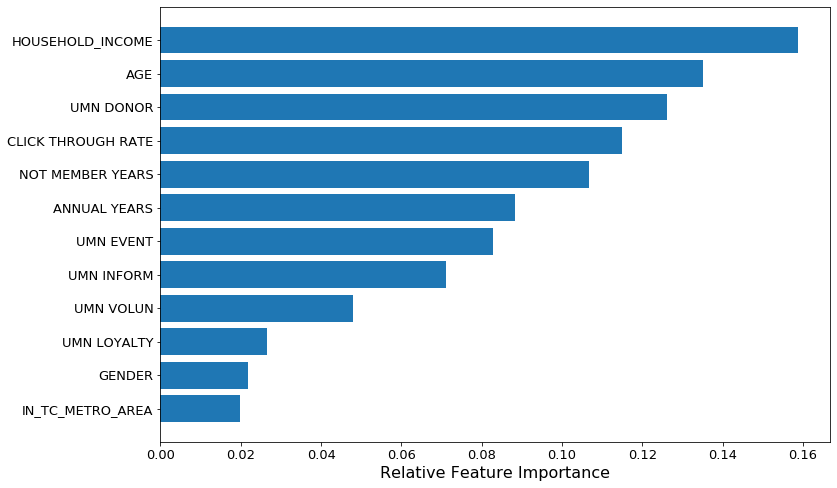

In [479]:
# feature importance graph
plt.figure(figsize=(12,8))
plt.barh(y = feature_importance.index, width = feature_importance.importance)
plt.xlabel('Relative Feature Importance', fontsize =  16)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.show()

# Lifetime Prediction for next year

In [480]:
# read data for prediction
data_next = pd.read_csv(path + 'Data_member_retention_future_prediction_final.csv')

In [481]:
# merge demographic information
data_prediction = pd.merge(data_next,individual_new, how = 'inner', on = 'ID_DEMO')

In [482]:
# first rows
data_prediction.head()

,ID_DEMO,UMN_event,UMN_member,UMN_donor,UMN_volun,UMN_inform,UMN_loyalty,UMN_avg_Annual_score_5_years,annual_years,life_years,...,Legislature_events,Networking_events,Other_events,Social_events,Sports_events,all_events,GENDER,AGE,HOUSEHOLD_INCOME,IN_TC_METRO_AREA
0,0000D38BF766D4EF9DBFB0446AE2F32E,0.0,0.0,0.0,0.0,3.4,0.0,3.4,1,0,...,0,0,0,0,0,0,F,37.0,40000.0,N
1,0000E4ABEC24DAB6D48282F478ECB142,0.0,0.0,0.0,0.0,4.0,0.0,4.0,1,0,...,0,0,0,1,0,1,F,32.0,82300.0,Y
2,0003162CCA58ACE2A48C489C0B3E4902,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1,0,...,0,0,0,1,0,1,M,33.0,82300.0,Y
3,000324BAB36E3C8392715FE8B7761251,3.4,4.2,2.4,4.2,4.6,0.0,18.8,5,0,...,0,0,0,2,0,6,F,81.0,89000.0,N
4,00033D516A88B736A9E09B714E64230E,0.0,3.8,4.2,0.0,2.6,0.0,10.6,5,0,...,0,0,0,0,0,0,M,87.0,245000.0,N


In [483]:
# check missing values
data_prediction.isnull().sum()

ID_DEMO                         0
UMN_event                       0
UMN_member                      0
UMN_donor                       0
UMN_volun                       0
UMN_inform                      0
UMN_loyalty                     0
UMN_avg_Annual_score_5_years    0
annual_years                    0
life_years                      0
nonmem_years                    0
membership_LastYear             0
membership_TwoYearsAgo          0
Learning_emails                 0
Legislature_emails              0
Social_emails                   0
Sports_emails                   0
general_ctr                     0
Learning_events                 0
Legislature_events              0
Networking_events               0
Other_events                    0
Social_events                   0
Sports_events                   0
all_events                      0
GENDER                          0
AGE                             0
HOUSEHOLD_INCOME                0
IN_TC_METRO_AREA                0
dtype: int64

In [484]:
# people who are annual member last year
data_prediction = data_prediction[data_prediction.membership_LastYear == 'annual-member']

In [485]:
# rename the column names
# just want to keep them as UPPER case
data_prediction.rename({'UMN_event':'UMN EVENT', "UMN_member":"UMN MEMBER","UMN_donor":"UMN DONOR","UMN_volun":"UMN VOLUN","UMN_inform":"UMN INFORM",\
                   "UMN_loyalty":"UMN LOYALTY",'annual_years':'ANNUAL YEARS', 'life_years':"LIFE YEARS",\
       'nonmem_years':"NOT MEMBER YEARS", 'life_before_15_flag':"IF LIFE MEMBER BEFORE 2015", 'ctr':"CLICK THROUGH RATE",\
       'events_total':'EVENTS ATTENDED IN TOTAL','general_ctr':"CLICK THROUGH RATE"}, inplace = True, axis =1)

In [486]:
# similarly, we need to change the data values to the type that our model can recognize 
data_prediction.GENDER = np.where(data_prediction.GENDER == 'M',1,0)
data_prediction.IN_TC_METRO_AREA = np.where(data_prediction.IN_TC_METRO_AREA == 'Y',1,0)

In order to do prediction, we are using the model we just trained for the new data. And we need to keep the fields/columns the same as what we have in training

In [487]:
x = data_prediction[['UMN EVENT', 'UMN DONOR', 'UMN VOLUN', 'UMN INFORM', 'UMN LOYALTY',
       'ANNUAL YEARS', 'NOT MEMBER YEARS', 'CLICK THROUGH RATE', 'GENDER',
       'AGE', 'HOUSEHOLD_INCOME', 'IN_TC_METRO_AREA']]

In [488]:
x.head()

,UMN EVENT,UMN DONOR,UMN VOLUN,UMN INFORM,UMN LOYALTY,ANNUAL YEARS,NOT MEMBER YEARS,CLICK THROUGH RATE,GENDER,AGE,HOUSEHOLD_INCOME,IN_TC_METRO_AREA
3,3.4,2.4,4.2,4.6,0.0,5,0,0.071429,0,81.0,89000.0,0
4,0.0,4.2,0.0,2.6,0.0,5,0,0.011111,1,87.0,245000.0,0
9,0.2,2.2,0.0,1.8,5.0,3,2,0.009524,1,54.0,87000.0,1
13,0.8,3.6,0.6,5.0,0.0,4,1,0.000000,0,66.0,146000.0,1
21,0.0,2.6,0.0,0.2,0.0,5,0,0.000000,0,64.0,65000.0,1


In [489]:
# previous model is called 'rf', then use rf to train the new model
pred_rf_life = rf.predict(x)

In [490]:
# Output prediction result.
# the CSV file will generated in the end of this file, along with the probability of churn analysis.
predictions_rf_life = [1 - round(i[0],3) for i in rf.predict_proba(x)]
output_rf_life = pd.DataFrame({'ID_DEMO':data_prediction['ID_DEMO'].values,
                               'Probability_Life':predictions_rf_life})
# drop duplicates
output_rf_life = output_rf_life.drop_duplicates()
output_rf_life.head()

,ID_DEMO,Probability_Life
0,000324BAB36E3C8392715FE8B7761251,0.053
1,00033D516A88B736A9E09B714E64230E,0.096
2,00059A3F3288801E860D699BF1E5BA37,0.022
3,0009ACBC3A10AADFABBD0EB793512EEF,0.134
4,00107A602AF3496BFE67E96CF727875A,0.034


# Prediction for Churn Member

# Split Data

Our churn analysis model built on the same dataset as what we have for lifetime prediction. So in the previous feature engineer part, we already prepared the data well,the only change we need to do is change our predition Y variable.

**How we set the prediction flag**

If the membership status in 2019 not a member, set the value to 0, else 1.

* Membership status in 2019 is lifetime, then 0
* Membership status in 2019 is annual member, then 0
* Membership status in 2019 is not a member, then 1

In [492]:
data_training = data.copy()

In [493]:
# create predict/target variable
data_training['membership_LastYear'] = np.where(data_training.membership_LastYear == 'non-member',1,0)
# rename the column
data_training.rename(columns = {'membership_LastYear':'TARGET'}, inplace = True)
# drop the column "membership_2018"
data_training.drop(['membership_TwoYearsAgo'],inplace = True, axis = 1)

In [494]:
data_training.head()

,ID_DEMO,UMN EVENT,UMN MEMBER,UMN DONOR,UMN VOLUN,UMN INFORM,UMN LOYALTY,UMN_avg_Annual_score_5_years,ANNUAL YEARS,LIFE YEARS,...,Legislature_events,Networking_events,Other_events,Social_events,Sports_events,all_events,GENDER,AGE,HOUSEHOLD_INCOME,IN_TC_METRO_AREA
0,000324BAB36E3C8392715FE8B7761251,4.0,4.0,1.75,4.00,4.5,0.0,18.25,4,0,...,0,0,0,2,0,6,0,81.0,89000.0,0
1,00033D516A88B736A9E09B714E64230E,0.0,4.0,4.00,0.00,2.5,0.0,10.50,4,0,...,0,0,0,0,0,0,1,87.0,245000.0,0
2,0009ACBC3A10AADFABBD0EB793512EEF,1.0,4.5,3.25,0.75,5.0,0.0,14.50,3,0,...,0,0,0,0,0,4,0,66.0,146000.0,1
3,000C1F987EE884E7B211BB73277629C0,0.0,3.5,1.00,0.00,4.0,0.0,8.50,3,0,...,0,0,0,0,0,0,0,28.0,164000.0,0
4,000E3CA77FA96024A62F117C8CB0574F,0.0,0.0,0.00,0.00,3.0,0.0,3.00,1,0,...,0,0,0,0,0,0,0,29.0,13000.0,1


**Feature Selection**

We exclude UMAA score since there is only 1 year data. Similarly, we use `click_through_rate` to measure how customer respond to our emails. IN addition, we alsu want to use sub-category engagement scores. 

We didn't use `UMN_MEMBER` score since we think this score doesn't truly reflect members' status. For example, for non-members, they definitely don't have a good UMN MEMBER score, but they are also likely to become a great member. 

In [495]:
# select features that you want to train for your model
data_training = data_training[['ID_DEMO','TARGET','UMN EVENT', 'UMN DONOR',
       'UMN VOLUN', 'UMN INFORM', 'UMN LOYALTY','NOT MEMBER YEARS','ANNUAL YEARS',
       'CLICK THROUGH RATE',
       'GENDER', 'AGE', 'HOUSEHOLD_INCOME', 'IN_TC_METRO_AREA']]

### Resample The Data

**Detail Explanation can be found in lifetime converstion part**

These two number indicates that there are 6589 people were annual member or not a member in 2019, and 3196 people became lifetime member in 2019.

We think this data is not that imbalanced, so the data manipulation here isn't as the same as what we did in lifetime converstion analysis. We used a technique called `SMOTE` to resample data. 

In [496]:
# see the distribution of target variable
# table_name. column_name . value_counts() and 
# then you can know how many people lables 1 and how many labels 0
data_training.TARGET.value_counts()

0    6961
1    3261
Name: TARGET, dtype: int64

In [497]:
# have the training and testing data readt
y = data_training['TARGET']
x = data_training.drop(['ID_DEMO','TARGET'], axis = 1)

# train test split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.33, random_state = 42, stratify = y)

# resample data
sm = SMOTE(random_state = 42, sampling_strategy= 'auto')
X_train, y_train = sm.fit_sample(X_train, y_train.ravel())

# Random Forest for Churn member

**Random Forest Model**

Below is a model called random forest.

We train the model based on previous years data, and predict membership status next year. The below chunks trains the model.

In [498]:
# hyper parameters to tune
# n_estimators = [100,300,500,600]
# max_depth = [4,6,8]
# min_samples_split = [2,4]
# hyper = dict(n_estimators = n_estimators, max_depth = max_depth, 
#              min_samples_split = min_samples_split)
# rf = RandomizedSearchCV(RandomForestClassifier(),hyper,cv = 3)

# train model
rf = RandomForestClassifier(n_estimators= 600, max_depth = 8,min_samples_split=4)
# fit the model
rf.fit(X_train,y_train)
# predict result using the trained model
pred_rf_churn = rf.predict(X_test)
pred_rf_churn_all = rf.predict(x)

In [499]:
# Get the model performance
# the result will be printed out by running the below code
print(classification_report(y_test,pred_rf_churn ))

# Get all measurement
columns_name = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
accuracy = accuracy_score(y_test, pred_rf_churn)
print('Accuracy of Decision Tree is {0}'.format(round(accuracy,4)))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      2298
           1       0.67      0.68      0.68      1076

    accuracy                           0.79      3374
   macro avg       0.76      0.76      0.76      3374
weighted avg       0.79      0.79      0.79      3374

Accuracy of Decision Tree is 0.7916


In [500]:
# feature importance
feature_importance = pd.DataFrame(rf.feature_importances_,
                                 index = X_train.columns,
                                 columns = ['importance']).sort_values('importance', 
                                                                       ascending = True)
feature_importance.sort_values(by = 'importance', ascending = False).head()
# output the feature importance file
# feature_importance.sort_values(by = 'importance', ascending = False).to_csv('Feature_importance_Churn.csv')

,importance
ANNUAL YEARS,0.471164
NOT MEMBER YEARS,0.139117
AGE,0.125468
UMN DONOR,0.087789
HOUSEHOLD_INCOME,0.036499


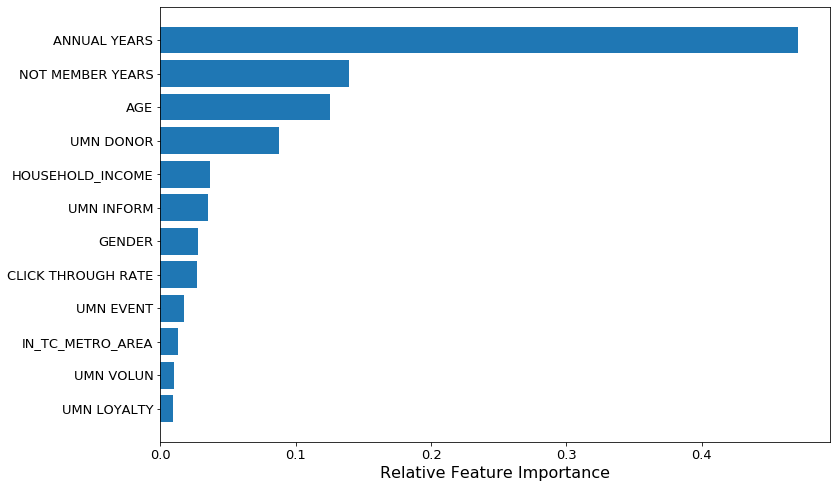

In [501]:
plt.figure(figsize=(12,8))
plt.barh(y = feature_importance.index, width = feature_importance.importance)
plt.xlabel('Relative Feature Importance', fontsize =  16)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.show()

# Churn Prediction for next year

In [504]:
# read data for prediction
data_next = pd.read_csv(path + 'Data_member_retention_future_prediction_final.csv')

In [505]:
# merge demographic information
data_prediction = pd.merge(data_next,individual_new, how = 'inner', on = 'ID_DEMO')

In [506]:
# first rows
data_prediction.head()

,ID_DEMO,UMN_event,UMN_member,UMN_donor,UMN_volun,UMN_inform,UMN_loyalty,UMN_avg_Annual_score_5_years,annual_years,life_years,...,Legislature_events,Networking_events,Other_events,Social_events,Sports_events,all_events,GENDER,AGE,HOUSEHOLD_INCOME,IN_TC_METRO_AREA
0,0000D38BF766D4EF9DBFB0446AE2F32E,0.0,0.0,0.0,0.0,3.4,0.0,3.4,1,0,...,0,0,0,0,0,0,F,37.0,40000.0,N
1,0000E4ABEC24DAB6D48282F478ECB142,0.0,0.0,0.0,0.0,4.0,0.0,4.0,1,0,...,0,0,0,1,0,1,F,32.0,82300.0,Y
2,0003162CCA58ACE2A48C489C0B3E4902,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1,0,...,0,0,0,1,0,1,M,33.0,82300.0,Y
3,000324BAB36E3C8392715FE8B7761251,3.4,4.2,2.4,4.2,4.6,0.0,18.8,5,0,...,0,0,0,2,0,6,F,81.0,89000.0,N
4,00033D516A88B736A9E09B714E64230E,0.0,3.8,4.2,0.0,2.6,0.0,10.6,5,0,...,0,0,0,0,0,0,M,87.0,245000.0,N


In [507]:
# check missing values
data_prediction.isnull().sum()

ID_DEMO                         0
UMN_event                       0
UMN_member                      0
UMN_donor                       0
UMN_volun                       0
UMN_inform                      0
UMN_loyalty                     0
UMN_avg_Annual_score_5_years    0
annual_years                    0
life_years                      0
nonmem_years                    0
membership_LastYear             0
membership_TwoYearsAgo          0
Learning_emails                 0
Legislature_emails              0
Social_emails                   0
Sports_emails                   0
general_ctr                     0
Learning_events                 0
Legislature_events              0
Networking_events               0
Other_events                    0
Social_events                   0
Sports_events                   0
all_events                      0
GENDER                          0
AGE                             0
HOUSEHOLD_INCOME                0
IN_TC_METRO_AREA                0
dtype: int64

In [508]:
# people who are annual member last year
data_prediction = data_prediction[data_prediction.membership_LastYear == 'annual-member']

In [509]:
# rename the column names
# just want to keep them as UPPER case
data_prediction.rename({'UMN_event':'UMN EVENT', "UMN_member":"UMN MEMBER","UMN_donor":"UMN DONOR","UMN_volun":"UMN VOLUN","UMN_inform":"UMN INFORM",\
                   "UMN_loyalty":"UMN LOYALTY",'annual_years':'ANNUAL YEARS', 'life_years':"LIFE YEARS",\
       'nonmem_years':"NOT MEMBER YEARS", 'life_before_15_flag':"IF LIFE MEMBER BEFORE 2015", 'ctr':"CLICK THROUGH RATE",\
       'events_total':'EVENTS ATTENDED IN TOTAL','general_ctr':"CLICK THROUGH RATE"}, inplace = True, axis =1)

In [510]:
# similarly, we need to change the data values to the type that our model can recognize 
data_prediction.GENDER = np.where(data_prediction.GENDER == 'M',1,0)
data_prediction.IN_TC_METRO_AREA = np.where(data_prediction.IN_TC_METRO_AREA == 'Y',1,0)

In order to do prediction, we are using the model we just trained for the new data. And we need to keep the fields/columns the same as what we have in training

In [511]:
x = data_prediction[['UMN EVENT', 'UMN DONOR', 'UMN VOLUN', 'UMN INFORM', 'UMN LOYALTY',
       'ANNUAL YEARS', 'NOT MEMBER YEARS', 'CLICK THROUGH RATE', 'GENDER',
       'AGE', 'HOUSEHOLD_INCOME', 'IN_TC_METRO_AREA']]

In [512]:
x.head()

,UMN EVENT,UMN DONOR,UMN VOLUN,UMN INFORM,UMN LOYALTY,ANNUAL YEARS,NOT MEMBER YEARS,CLICK THROUGH RATE,GENDER,AGE,HOUSEHOLD_INCOME,IN_TC_METRO_AREA
3,3.4,2.4,4.2,4.6,0.0,5,0,0.071429,0,81.0,89000.0,0
4,0.0,4.2,0.0,2.6,0.0,5,0,0.011111,1,87.0,245000.0,0
9,0.2,2.2,0.0,1.8,5.0,3,2,0.009524,1,54.0,87000.0,1
13,0.8,3.6,0.6,5.0,0.0,4,1,0.000000,0,66.0,146000.0,1
21,0.0,2.6,0.0,0.2,0.0,5,0,0.000000,0,64.0,65000.0,1


In [513]:
# previous model is called 'rf', then use rf to train the new model
pred_rf_churn = rf.predict(x)

In [514]:
# Output prediction result.
# the CSV file will generated in the end of this file, along with the probability of churn analysis.
predictions_rf_churn = [1 - round(i[0],3) for i in rf.predict_proba(x)]
output_rf_churn = pd.DataFrame({'ID_DEMO':data_prediction['ID_DEMO'].values,
                               'Probability_Churn':predictions_rf_churn})
# drop duplicates
output_rf_churn = output_rf_churn.drop_duplicates()
output_rf_churn.head()

,ID_DEMO,Probability_Churn
0,000324BAB36E3C8392715FE8B7761251,0.663
1,00033D516A88B736A9E09B714E64230E,0.536
2,00059A3F3288801E860D699BF1E5BA37,0.530
3,0009ACBC3A10AADFABBD0EB793512EEF,0.566
4,00107A602AF3496BFE67E96CF727875A,0.610


# Export Probability

Since we trained the model using the same dataset, so our final CSV file will have two columns. One is the probability for churn, another is the probability for lifetime member. 

In [515]:
output_rf = pd.merge(output_rf_life,output_rf_churn , how = 'outer', on = 'ID_DEMO')
output_rf = pd.merge(output_rf,individual, how = 'inner', on = 'ID_DEMO')

In [516]:
output_rf.ID_DEMO.nunique()

9758

In [517]:
output_rf.head()

,ID_DEMO,Probability_Life,Probability_Churn,ID_SPOUSE,MARITAL_STATUS,GENDER,BIRTH_YEAR,AGE,ZIP_CODE,IN_TC_METRO_AREA,HOUSEHOLD_INCOME,MOST_RECENT_COLLEGE,MOST_RECENT_GRAD_YEAR,ATHLETIC_INTEREST,TRAVEL_INTEREST,MEMBERSHIP_TYPE_CODE,MEMBERSHIP_STATUS_CODE,FIRST_EVER_START_DATE,EXP_DATE_LAST_MEMBERSHIP
0,000324BAB36E3C8392715FE8B7761251,0.053,0.663,5AA30AB6333AFF2D85BC74078F0E1543,M,F,1939.0,81.0,85387,N,89000.0,EHD,1960,N,N,A,C,1986-09-01,2020-10-31
1,00033D516A88B736A9E09B714E64230E,0.096,0.536,1555FD1E564FFCB2AAA39ACEB29904B4,M,M,1933.0,87.0,56452,N,245000.0,EHD,1964,N,N,A,C,1999-11-29,2020-12-31
2,00059A3F3288801E860D699BF1E5BA37,0.022,0.530,3AEC13C183FC9C15E105CF9204508CFE,M,M,1966.0,54.0,55120,Y,87000.0,MED,2014,Y,N,A,C,2019-04-10,2020-04-30
3,0009ACBC3A10AADFABBD0EB793512EEF,0.134,0.566,83735CC835A2091A35B7B1B2379ED34F,M,F,1954.0,66.0,55044,Y,146000.0,EHD,1985,N,N,A,C,1982-06-01,2021-01-31
4,00107A602AF3496BFE67E96CF727875A,0.034,0.610,NaN,U,F,1956.0,64.0,55421,Y,65000.0,DES,1992,N,N,A,C,2019-01-17,2020-01-31


In [518]:
output_rf.to_csv('Prediction_Member_Retention.csv', index = False)